In [1]:
from dataset import NAIPGeo
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import torch
from sklearn.cluster import KMeans

from torch.utils.data import DataLoader

In [2]:
device = torch.device("cuda:2")

In [3]:
%%time
ds = NAIPGeo(root="data/")

CPU times: user 29.1 s, sys: 130 ms, total: 29.2 s
Wall time: 29.2 s


In [4]:
dl = DataLoader(ds, batch_size=100, num_workers=24, shuffle=False)

In [5]:
means = np.zeros((len(ds), 4), dtype=np.float32)
points = np.zeros((len(ds), 2), dtype=np.float32)

i = 0
for batch in tqdm(dl):
    images = batch["image"].to(device)
    batch_size = images.shape[0]

    t_points = batch["point"].numpy()
    with torch.no_grad():
        t_means = (images / 255.0).mean(dim=(2, 3)).cpu().numpy()

    means[i : i + batch_size] = t_means
    points[i : i + batch_size] = t_points
    i += batch_size

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.43it/s]


In [15]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(means)

/opt/conda/envs/naip/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


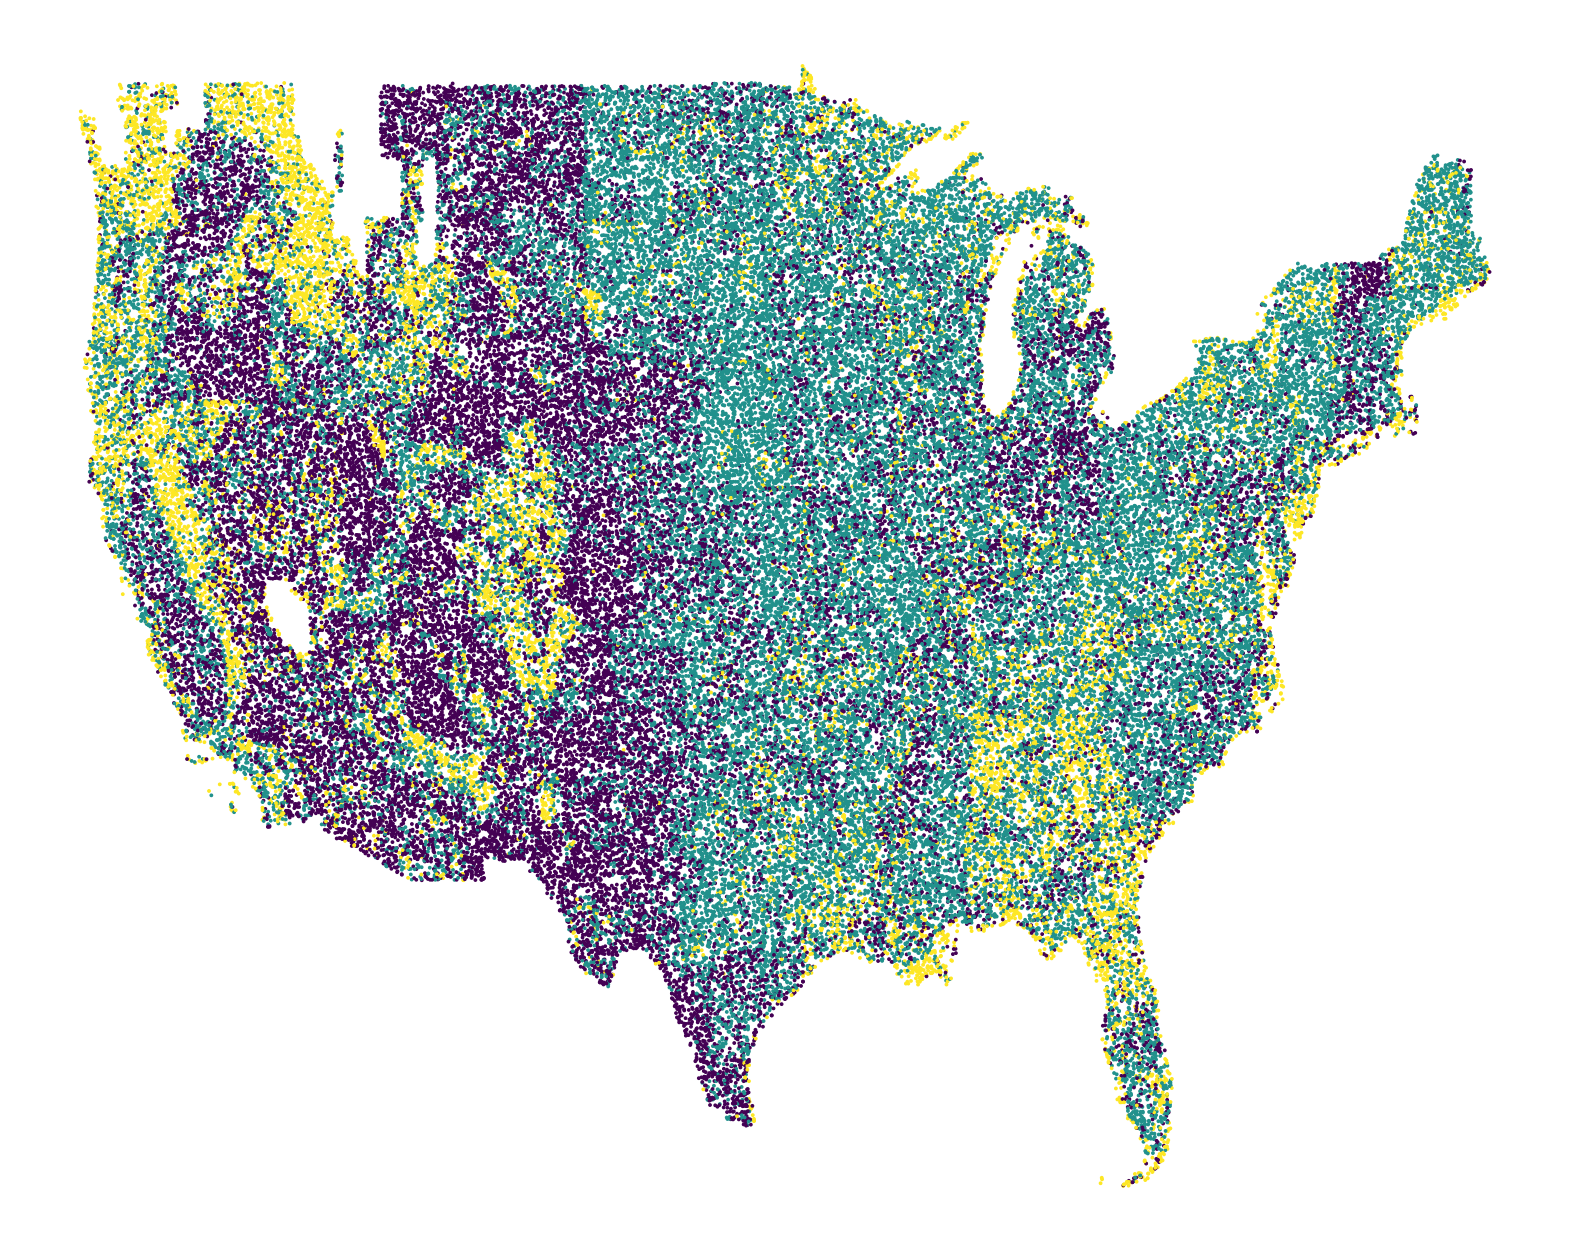

In [16]:
plt.figure(figsize=(20, 16))
plt.scatter(points[:, 1], points[:, 0], s=3, c=labels)
plt.axis("off")
plt.show()
plt.close()